# Data Preparation

Dataset: <a href="https://www.kaggle.com/c/titanic/data">Kaggle Titanic Data</a><br>
Filename: Titanic_train.csv


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pd.options.display.float_format = '{:.2f}'.format

#Filter Warnings
import warnings
warnings.filterwarnings('ignore')

________

# Part 1 - All Features

## Load the Dataset
* Specify the Parameters (Filepath, Index Column)
* Check for Date-Time Columns to Parse Dates
* Check Encoding if file does not load correctly

In [3]:
base_df = pd.read_csv('./data/train.csv')

View the Dataset

In [4]:
base_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


Check the Shape

In [5]:
base_df.shape

(891, 12)

Set the correct index

In [6]:
base_df.set_index('PassengerId', inplace=True)

base_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


## Ensure Columns / Features have Proper Labels

In [7]:
base_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
base_df.rename(
    columns={
        'Pclass': 'Ticket_Class',
        'SibSp': 'Siblings_or_Spouses',
        'Parch': 'Parents_or_Children'
    },
    inplace=True)

base_df.columns

Index(['Survived', 'Ticket_Class', 'Name', 'Sex', 'Age', 'Siblings_or_Spouses',
       'Parents_or_Children', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Ensure Correct Format of Values

In [9]:
base_df.dtypes

Survived                 int64
Ticket_Class             int64
Name                    object
Sex                     object
Age                    float64
Siblings_or_Spouses      int64
Parents_or_Children      int64
Ticket                  object
Fare                   float64
Cabin                   object
Embarked                object
dtype: object

## Remove Duplicates

Check if Index is duplicated

In [10]:
base_df.index.duplicated().sum()

0

Check if there are duplicated rows


In [11]:
base_df[base_df.duplicated()]

,Survived,Ticket_Class,Name,Sex,Age,Siblings_or_Spouses,Parents_or_Children,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


Remove the duplicates if any

In [12]:
base_df.drop_duplicates(inplace=True)

## Handle Missing Data

Check for missing data

In [13]:
total = base_df.isnull().sum()

In [14]:
percent = (base_df.isnull().sum()/base_df.isnull().count()).sort_values(ascending=False)

In [15]:
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Survived,0,0.00
Ticket_Class,0,0.00
Name,0,0.00
Sex,0,0.00
Age,177,0.20
Siblings_or_Spouses,0,0.00
Parents_or_Children,0,0.00
Ticket,0,0.00
Fare,0,0.00
Cabin,687,0.77


Handle the columns with missing values
* For numerical values, fill in with either the mean or the median
* For categorical values, fill with a value to represent Unknown values. 

In [16]:
base_df.describe()

,Survived,Ticket_Class,Age,Siblings_or_Spouses,Parents_or_Children,Fare
count,891.00,891.00,714.00,891.00,891.00,891.00
mean,0.38,2.31,29.70,0.52,0.38,32.20
std,0.49,0.84,14.53,1.10,0.81,49.69
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.12,0.00,0.00,7.91
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,512.33


In [17]:
base_df.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Slayter, Miss. Hilda Mary",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [18]:
# Fill missing data
base_df['Embarked'].fillna('S', inplace=True)
base_df['Age'].fillna(29, inplace=True)
base_df['Cabin'].fillna('Unknown', inplace=True)

## Check the Distribution of the Target Variable

<AxesSubplot:xlabel='Survived', ylabel='count'>

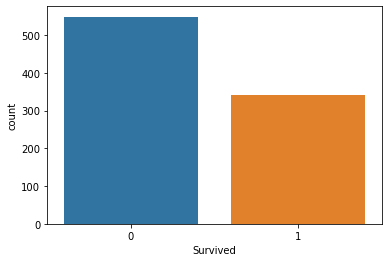

In [19]:
sns.countplot(x = base_df['Survived'])

## Split into Numerical, Categorical, and Target

In [20]:
#Categorical Features Only
# df_cat = base_df[['Sex', 'Cabin', 'Embarked', 'Ticket','Name']]
df_cat = base_df.select_dtypes(include='object')

#Numerical Features Only
df_num = base_df.select_dtypes(include=['int64','float64']).drop(columns=['Survived'])

_______

# Part 2 - Numerical Features

Get the statistics for numerical data

In [21]:
df_num.describe()

,Ticket_Class,Age,Siblings_or_Spouses,Parents_or_Children,Fare
count,891.00,891.00,891.00,891.00,891.00
mean,2.31,29.56,0.52,0.38,32.20
std,0.84,13.01,1.10,0.81,49.69
min,1.00,0.42,0.00,0.00,0.00
25%,2.00,22.00,0.00,0.00,7.91
50%,3.00,29.00,0.00,0.00,14.45
75%,3.00,35.00,1.00,0.00,31.00
max,3.00,80.00,8.00,6.00,512.33


Analyze the following features:
1. Pclass
    1. Get Value Counts
2. Age
    1. Plot the distribution
    2. Create a Boxplot
3. Fare
    1. Plot the distribution
    2. Create a Boxplot

*For now, do not remove any outliers*

In [22]:
df_num['Ticket_Class'].value_counts()

3    491
1    216
2    184
Name: Ticket_Class, dtype: int64

<AxesSubplot:ylabel='Density'>

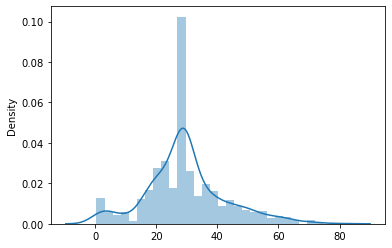

In [23]:
sns.distplot(x = df_num['Age'])

<AxesSubplot:xlabel='Age'>

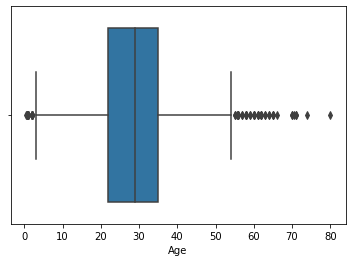

In [24]:
sns.boxplot(df_num['Age'], orient='v')

<AxesSubplot:ylabel='Density'>

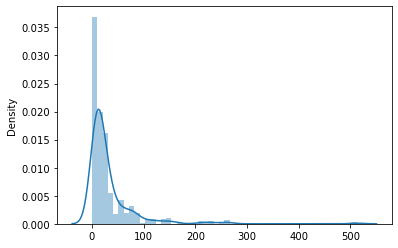

In [25]:
sns.distplot(x=df_num['Fare'])

<AxesSubplot:xlabel='Fare'>

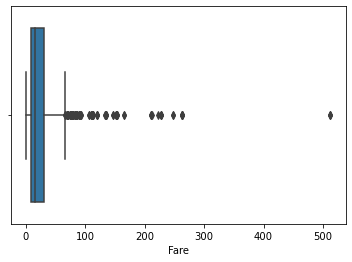

In [26]:
sns.boxplot(df_num['Fare'], orient='v')

## Feature Scaling 

Check Scale of Features

In [27]:
df_num.describe()

,Ticket_Class,Age,Siblings_or_Spouses,Parents_or_Children,Fare
count,891.00,891.00,891.00,891.00,891.00
mean,2.31,29.56,0.52,0.38,32.20
std,0.84,13.01,1.10,0.81,49.69
min,1.00,0.42,0.00,0.00,0.00
25%,2.00,22.00,0.00,0.00,7.91
50%,3.00,29.00,0.00,0.00,14.45
75%,3.00,35.00,1.00,0.00,31.00
max,3.00,80.00,8.00,6.00,512.33


Use the MinMax Scaler to scale the numerical features

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [29]:
scaled_val = scaler.fit_transform(df_num)

df_num_scaled = pd.DataFrame(scaled_val, columns=df_num.columns, index=df_num.index)

In [30]:
df_num_scaled.head()

,Ticket_Class,Age,Siblings_or_Spouses,Parents_or_Children,Fare
PassengerId,,,,,
1,1.00,0.27,0.12,0.00,0.01
2,0.00,0.47,0.12,0.00,0.14
3,1.00,0.32,0.00,0.00,0.02
4,0.00,0.43,0.12,0.00,0.10
5,1.00,0.43,0.00,0.00,0.02


<AxesSubplot:xlabel='Fare', ylabel='Density'>

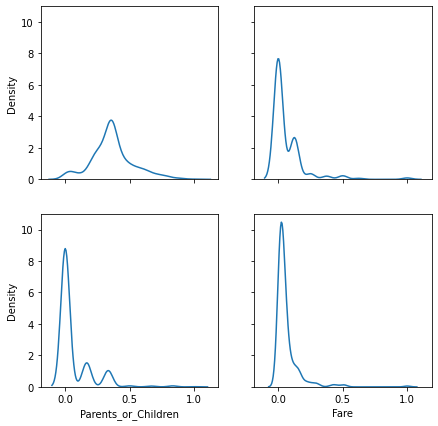

In [31]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True,sharey=True)
sns.distplot(df_num_scaled['Age'], hist=False, ax=axes[0,0])
sns.distplot(df_num_scaled['Siblings_or_Spouses'], hist=False,ax=axes[0,1])
sns.distplot(df_num_scaled['Parents_or_Children'], hist=False, ax=axes[1,0])
sns.distplot(df_num_scaled['Fare'], hist=False, ax=axes[1,1])

______

# Part 3 - Categorical Features

Get the statistics for the categorical features

In [32]:
df_cat.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,148,3
top,"Slayter, Miss. Hilda Mary",male,CA. 2343,Unknown,S
freq,1,577,7,687,646


Remove any categorical features which does not add value to the model.<br>
In this case this would be the following features:
* Name = name of the passenger
* Ticket = ticket number
* Cabin = cabin number

In [33]:
df_cat.drop(columns=['Cabin', 'Ticket', 'Name'], inplace=True)

Print categorical values for each feature

In [34]:
for cat_col in list(df_cat.columns):
    print(df_cat[cat_col].value_counts())
    print("---------\n")

male      577
female    314
Name: Sex, dtype: int64
---------

S    646
C    168
Q     77
Name: Embarked, dtype: int64
---------



Convert Categories to Number 

In [35]:
df_cat = pd.get_dummies(df_cat)

df_cat.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,
1,0,1,0,0,1
2,1,0,1,0,0
3,1,0,0,0,1
4,1,0,0,0,1
5,0,1,0,0,1


_______

# Combine all the prepared dataframes

In [36]:
df_list = [df_num_scaled, df_cat, base_df['Survived']]

full_df = pd.concat(df_list, axis=1)

In [37]:
full_df.head()

,Ticket_Class,Age,Siblings_or_Spouses,Parents_or_Children,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
PassengerId,,,,,,,,,,,
1,1.00,0.27,0.12,0.00,0.01,0,1,0,0,1,0
2,0.00,0.47,0.12,0.00,0.14,1,0,1,0,0,1
3,1.00,0.32,0.00,0.00,0.02,1,0,0,0,1,1
4,0.00,0.43,0.12,0.00,0.10,1,0,0,0,1,1
5,1.00,0.43,0.00,0.00,0.02,0,1,0,0,1,0


## Save final DataFrame as a csv file

In [38]:
full_df.to_csv('./data/titanic_cleaned.csv',index=False)

### Check if it loads correctly

In [39]:
file = pd.read_csv('./data/titanic_cleaned.csv')

file.head()

,Ticket_Class,Age,Siblings_or_Spouses,Parents_or_Children,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,1.00,0.27,0.12,0.00,0.01,0,1,0,0,1,0
1,0.00,0.47,0.12,0.00,0.14,1,0,1,0,0,1
2,1.00,0.32,0.00,0.00,0.02,1,0,0,0,1,1
3,0.00,0.43,0.12,0.00,0.10,1,0,0,0,1,1
4,1.00,0.43,0.00,0.00,0.02,0,1,0,0,1,0
